In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
import seaborn as sns

# Data Exploration for House Price Prediction

## Introduction
This notebook explores the dataset used for predicting house prices. It includes visualizations and statistical summaries to understand the data distribution and relationships between features.

## Loading and Previewing the Data

In [2]:
filepath = '../data/raw/house_prices.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
# Drop the 'Index' column
df.drop(columns=['Index'], inplace=True)

In [5]:
df.head(2)

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN


In [6]:
df.shape

(187531, 20)

## Understanding the Structure

In [7]:
# Get information about the dataset
print(df.info())
print()
# Check for missing values
print(df.isnull().sum()/len(df) * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              187531 non-null  object 
 1   Description        184508 non-null  object 
 2   Amount(in rupees)  187531 non-null  object 
 3   Price (in rupees)  169866 non-null  float64
 4   location           187531 non-null  object 
 5   Carpet Area        106858 non-null  object 
 6   Status             186916 non-null  object 
 7   Floor              180454 non-null  object 
 8   Transaction        187448 non-null  object 
 9   Furnishing         184634 non-null  object 
 10  facing             117298 non-null  object 
 11  overlooking        106095 non-null  object 
 12  Society            77853 non-null   object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Car Parking        84174 non-null   object 
 16  Ow

 1. **Data Overview**
 
 - The dataset consists of 187,531 entries with 20 columns, mostly containing categorical and object-type data, with a few numerical columns.

- Columns such as `Dimensions` and `Plot Area` are entirely null, while others like `Carpet Area`, `Super Area`, `Society`, `Car Parking`, and `Ownership` have a high percentage of missing data.

2. **Missing Values**

- Significant missing data was observed in several columns:
    - `Dimensions` and `Plot Area:` 100% missing.
    - `Society`, `Car Parking`, and `Super Area`: Over 50% missing.
    - `Facing`, `Overlooking`, and `Ownership`: 30-40% missing.
    - `Carpet Area` and `Balcony`: Approximately 40-45% missing.

## Handling Missing Values

In [8]:
# Drop columns with more that 30% missing values
threshold = len(df) * 0.3
df.dropna(thresh=threshold, axis=1, inplace=True)

In [9]:
df.head(1)

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN


In [10]:
def convert_amount(amount):
    """Convert 'Amount(in rupees)' from string to numeric value."""
    if pd.isna(amount):
        return None
    # If the amount is already a numeric type, return it as float
    if isinstance(amount, (int, float)):
        return float(amount)
    # If the amount is a string, process it
    if isinstance(amount, str):
        amount = amount.strip()
        if amount == 'Call for Price':
            return None
        if 'Lac' in amount:
            try:
                return float(amount.replace(' Lac', '').replace(',', '')) * 100000
            except ValueError:
                return None
        if 'Cr' in amount:
            try:
                return float(amount.replace(' Cr', '').replace(',', '')) * 10000000
            except ValueError:
                return None
        # Handle plain numeric strings
        try:
            return float(amount.replace(',', ''))
        except ValueError:
            return None
    # For any other data type, return None
    return None

def convert_area(area):
    """Convert area-related columns from string to numeric value."""
    if pd.isna(area):
        return None
    # If the area is already a numeric type, return it as float
    if isinstance(area, (int, float)):
        return float(area)
    # If the area is a string, process it
    if isinstance(area, str):
        area = area.strip()
        try:
            return float(area.replace(' sqft', '').replace(',', ''))
        except ValueError:
            return None
    # For any other data type, return None
    return None

# Convert 'Amount(in rupees)' to numeric
df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

# Convert 'Carpet Area' and 'Super Area' to numeric
df['Carpet Area'] = df['Carpet Area'].apply(convert_area)
df['Super Area'] = df['Super Area'].apply(convert_area)

In [11]:
# Verify the conversions
print(df.dtypes)
df.head()

Title                 object
Description           object
Amount(in rupees)    float64
Price (in rupees)    float64
location              object
Carpet Area          float64
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom              object
Balcony               object
Car Parking           object
Ownership             object
Super Area           float64
dtype: object


,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,NaN,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN


## Descriptive Statistics

In [12]:
# Get summary statistics for numerical column
df.describe().applymap(lambda x: f'{x:.3f}')

,Amount(in rupees),Price (in rupees),Carpet Area,Super Area
count,177847.000,169866.000,100428.000,75406.000
mean,11981344.189,7583.772,1268.526,1385.678
std,39438269.433,27241.706,3129.312,749.161
min,100000.000,0.000,1.000,1.000
25%,4840000.000,4297.000,801.000,1000.000
50%,7800000.000,6034.000,1071.000,1300.000
75%,14500000.000,9450.000,1500.000,1687.000
max,14003000000.000,6700000.000,709222.000,40000.000


In [13]:
# Get summary statistics for categoricl columns
df.describe(include=['O']).iloc[:, 2:]

,location,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership
count,187531,186916,180454,187448,184634,117298,106095,77853,186703,138596,84174,122014
unique,81,1,947,4,3,8,19,10376,11,11,229,4
top,new-delhi,Ready to Move,2 out of 4,Resale,Semi-Furnished,East,Main Road,Hamdam Apartment,2,2,1 Covered,Freehold
freq,27599,186916,12433,144172,88318,54741,32193,1648,93007,51809,38754,112229


3. **Descriptive Statistics for Numerical Columns**

- `Carpet Area` and `Super Area`:
    - The area values range broadly, with a high standard deviation indicating significant variability.
    - Max values are unusually high, suggesting possible outliers.

4. **Summary Statistics for Categorical Columns**

- `Location`: 81 unique values with New Delhi as the most frequent location.
- `Floor`: High variance with 947 unique floor combinations.
- `Transaction`: Resale dominates the transaction type.
- `Furnishing`: `Semi-Furnished` is the most common.
- `Facing`: `Eas`t is the most frequent orientation.
- `Overlooking`: `Main Road` is the most common view.

## Visual Exploration

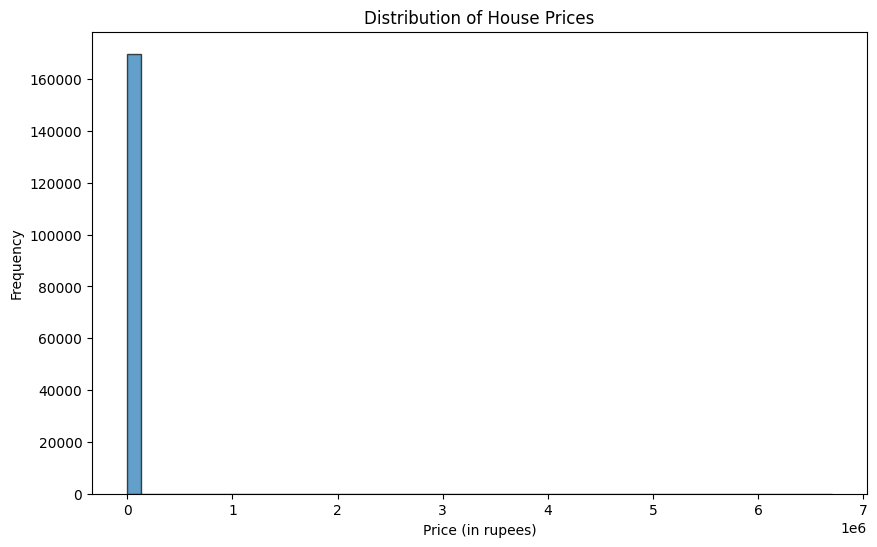

In [14]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price (in rupees)'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()

5. **Distribution Analysis**

- Price distribution shows that most properties fall within a realistic range, though extreme values could indicate outliers.

## Correlation Analysis

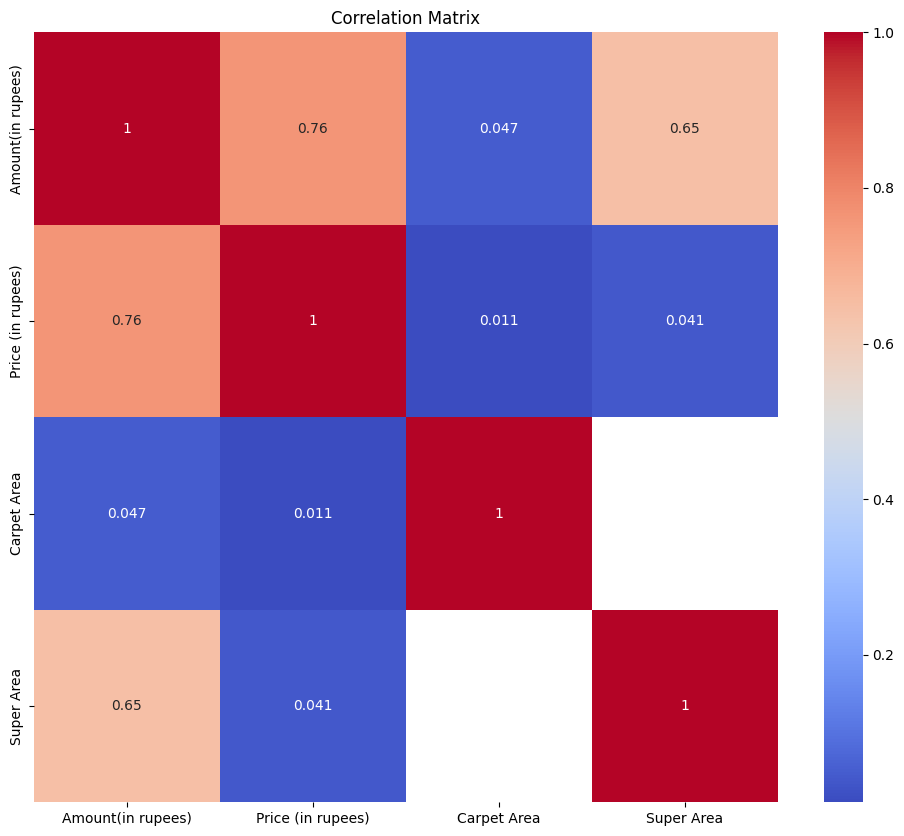

In [15]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
corr_with_price = df.corr(numeric_only=True)['Price (in rupees)'].sort_values(ascending=True)
print(corr_with_price)

Carpet Area          0.010515
Super Area           0.040946
Amount(in rupees)    0.762790
Price (in rupees)    1.000000
Name: Price (in rupees), dtype: float64


6. **Correlation Analysis**

- `Amount(in rupees)` is moderately correlated with `Price (in rupees)` (0.76) and `Super Area` (0.65), indicating these features are interrelated.

- `Carpet Area` has a weak correlation with both price and amount, suggesting that area alone may not fully explain pricing.